# Match Rating
Using numpy and panda to get the chance of victory of a team in a tournament

In [89]:
%matplotlib inline

import numpy as np
import pandas as pd

Loading up the data of the LCS SPRING 2016 tournament

## Fatures:
    
* MPB/MPP = Match Points Blue/Purple
* MR = Match Result (B = Blue won, P = Purple won)
* TRB/TRP = Team Rank Blue/Purple
* FRR = First Round Result (B/P)
* RB/RP = Rating of team Blue/Purple
* W10B/W10P = Wins in the last 10 months team Blue/Purple
* L10B/L10P = Losses in the last 10 months team Blue/Purple
* HWB/HWP = Historic Wins by Blue/Purple against this opponent
* GBB/GBP = GosuBet on Blue/Purple
* BO = Best of 1, 3 or 5
* url = url of the match

In [91]:
dta = pd.read_csv('data/lol-2016/lcs-s-16.csv', parse_dates=[1])
dta

,div,data,TeamBlue,TeamPurple,MPB,MPP,MR,TRB,TRP,FRR,...,W10B,L10B,W10P,L10P,HWB,HWP,GBB,GBP,BO,url
0,lcs-s-16,2016-02-01,Counter Logic Gaming LoL,Renegades - LoL,1,0,B,11,33,B,...,27.0,13.0,27.0,13.0,0.000000,100.000000,0.000000,100.000000,1,http://www.gosugamers.net/lol/tournaments/8554...
1,lcs-s-16,2016-02-29,Renegades - LoL,Team Dignitas - LoL,1,0,B,33,58,B,...,7.0,22.0,7.0,22.0,100.000000,0.000000,29.000000,71.000000,1,http://www.gosugamers.net/lol/tournaments/8554...
2,lcs-s-16,2016-02-27,Team Solomid,Echo Fox,1,0,B,23,48,B,...,20.0,11.0,20.0,11.0,0.000000,100.000000,58.000000,42.000000,1,http://www.gosugamers.net/lol/tournaments/8554...
3,lcs-s-16,2016-02-22,Team Liquid LoL,Immortals,0,1,P,22,5,P,...,20.0,2.0,20.0,2.0,100.000000,0.000000,30.000000,70.000000,1,http://www.gosugamers.net/lol/tournaments/8554...
4,lcs-s-16,2016-02-07,Team Impulse,NRG eSports,0,1,P,45,37,P,...,15.0,10.0,15.0,10.0,0.000000,100.000000,41.000000,59.000000,1,http://www.gosugamers.net/lol/tournaments/8554...
5,lcs-s-16,2016-03-21,Team Solomid,NRG eSports,0,1,P,23,37,P,...,20.0,10.0,20.0,10.0,100.000000,0.000000,72.000000,28.000000,1,http://www.gosugamers.net/lol/tournaments/8554...
6,lcs-s-16,2016-02-08,Team Impulse,Counter Logic Gaming LoL,0,1,P,45,11,P,...,15.0,15.0,15.0,15.0,66.666667,33.333333,41.000000,59.000000,1,http://www.gosugamers.net/lol/tournaments/8554...
7,lcs-s-16,2016-02-28,Team Impulse,NRG eSports,1,0,B,45,37,B,...,15.0,10.0,15.0,10.0,100.000000,0.000000,42.000000,58.000000,1,http://www.gosugamers.net/lol/tournaments/8554...
8,lcs-s-16,2016-02-06,Team Liquid LoL,Team Dignitas - LoL,1,0,B,22,58,B,...,20.0,22.0,20.0,22.0,37.500000,62.500000,63.000000,37.000000,1,http://www.gosugamers.net/lol/tournaments/8554...
9,lcs-s-16,2016-03-20,Immortals,Team Impulse,1,0,B,5,45,B,...,18.0,18.0,18.0,18.0,0.000000,100.000000,87.000000,13.000000,1,http://www.gosugamers.net/lol/tournaments/8554...


Separating the data for training and for test

In [73]:
train_idx = np.array(dta.data < '2016-02-27') #year month day
test_idx = np.array(dta.data >= '2016-02-27') #year month day

results_train = np.array(dta.MR[train_idx])
results_test = np.array(dta.MR[test_idx])
print("Training set:", len(results_train), "Test set:", len(results_test))
dta[test_idx]

Training set: 60 Test set: 30


,div,data,TeamBlue,TeamPurple,MPB,MPP,MR,TRB,TRP,FRR,...,W10B,L10B,W10P,L10P,HWB,HWP,GBB,GBP,BO,url
1,lcs-s-16,2016-02-29,Renegades - LoL,Team Dignitas - LoL,1,0,B,33,58,B,...,7.0,22.0,7.0,22.0,100.000000,0.000000,29.0,71.0,1,http://www.gosugamers.net/lol/tournaments/8554...
2,lcs-s-16,2016-02-27,Team Solomid,Echo Fox,1,0,B,23,48,B,...,20.0,11.0,20.0,11.0,0.000000,100.000000,58.0,42.0,1,http://www.gosugamers.net/lol/tournaments/8554...
5,lcs-s-16,2016-03-21,Team Solomid,NRG eSports,0,1,P,23,37,P,...,20.0,10.0,20.0,10.0,100.000000,0.000000,72.0,28.0,1,http://www.gosugamers.net/lol/tournaments/8554...
7,lcs-s-16,2016-02-28,Team Impulse,NRG eSports,1,0,B,45,37,B,...,15.0,10.0,15.0,10.0,100.000000,0.000000,42.0,58.0,1,http://www.gosugamers.net/lol/tournaments/8554...
9,lcs-s-16,2016-03-20,Immortals,Team Impulse,1,0,B,5,45,B,...,18.0,18.0,18.0,18.0,0.000000,100.000000,87.0,13.0,1,http://www.gosugamers.net/lol/tournaments/8554...
14,lcs-s-16,2016-03-20,Cloud 9,Echo Fox,1,0,B,19,48,B,...,22.0,11.0,22.0,11.0,0.000000,100.000000,91.0,9.0,1,http://www.gosugamers.net/lol/tournaments/8554...
17,lcs-s-16,2016-03-20,Cloud 9,Team Liquid LoL,0,1,P,19,22,P,...,22.0,13.0,22.0,13.0,25.000000,75.000000,77.0,23.0,1,http://www.gosugamers.net/lol/tournaments/8554...
19,lcs-s-16,2016-03-14,Echo Fox,Counter Logic Gaming LoL,0,1,P,48,11,P,...,6.0,15.0,6.0,15.0,100.000000,0.000000,21.0,79.0,1,http://www.gosugamers.net/lol/tournaments/8554...
20,lcs-s-16,2016-02-28,NRG eSports,Renegades - LoL,1,0,B,37,33,B,...,8.0,13.0,8.0,13.0,0.000000,100.000000,81.0,19.0,1,http://www.gosugamers.net/lol/tournaments/8554...
22,lcs-s-16,2016-03-13,Team Solomid,Team Impulse,1,0,B,23,45,B,...,20.0,18.0,20.0,18.0,33.333333,66.666667,82.0,18.0,1,http://www.gosugamers.net/lol/tournaments/8554...


Now the feature columns are setted so we can use it to train the machine-learning algorithm

In [79]:
feature_columns = ['TRB', 'TRP', 'RB', 'RP', 'W10B', 'L10B', 'W10P', 'L10P', 'HWB', 'HWP', 'GBB', 'GBP']

I don't really know if I needed this many manipulations, probably not. I just needed to concatenate train_arrays and test_arrays in a single place.
If you know of a faster way, please point to me.

In [80]:
#Column numbers for odds for the two outcomes 
cidx_home = [i for i, col in enumerate(dta.columns) if col[-1] in 'B' and col in feature_columns]
cidx_away = [i for i, col in enumerate(dta.columns) if col[-1] in 'P' and col in feature_columns]

#The two feature matrices for training
feature_train_home = dta.ix[train_idx, cidx_home].as_matrix()
feature_train_away = dta.ix[train_idx, cidx_away].as_matrix()

#The two feature matrices for testing
feature_test_home = dta.ix[test_idx, cidx_home].as_matrix()
feature_test_away = dta.ix[test_idx, cidx_away].as_matrix()

train_arrays = [feature_train_home, feature_train_away]
test_arrays = [feature_test_home, feature_test_away]

#merge the arrays
feature_train = np.concatenate(train_arrays, axis=1)
feature_test = np.concatenate(test_arrays, axis=1)

Now we are finally ready to use the data to train the algorithm. First an AdaBoostClassifier object is created, and here we need to give supply a set of arguments for it to work properly. The first argument is classification algoritm to use, which is the DecisionTreeClassifier algorithm. I have chosen to supply this algorithms with the max_dept=3 argument, which constrains the training algorithm to not apply more than three rules before making a prediction.

The n_estimators argument tells the algorithm how many decision trees it should fit, and the learning_rate argument tells the algorithm how much the misclassified matches are going to be up-weighted in the next round of decision three fitting. These two values are usually something that you can experiment with since there is no definite rule on how these should be set. The rule of thumb is that the lower the learning rate is, the more estimators you neeed. Actually there is way more to it, because if it is too large, it will miss the local minimum, if it is too low it will take FOREVER to reach the minimum.

The last argument, random_state, is a random seed. It is necessary if you want to reproduce the model fitting exactly every time. If this is not specified you will end up with slightly different trained algroithm each time you fit them.

At last the algorithm is fitted using the fit() method, which is supplied with the odds and match results.

In [81]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
 
adb = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3),
    n_estimators=1000,
    learning_rate=0.4, random_state=42)
 
adb = adb.fit(feature_train, results_train)

We can now see how well the trained algorithm fits the training data.

In [82]:
import sklearn.metrics as skm
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
 
training_pred = adb.predict(feature_train)
print (skm.confusion_matrix(list(training_pred), list(results_train)))

[[26  0]
 [ 0 34]]


We see that no matches in the training data are misclassified, usually this is not very good because it may imply that we have an overfitted model with poor predictive power on new data. This problem may be solved by tweaking features and adding more data.

Yeah, it may sound strange, but something that predicts 100% of accuracy the training data may actually be a bad thing.

Let’s try to predict the outcome of the LCS-Sprint 2016 from march to the end of the tournament.

Confusion matrix, without normalization
[[12  8]
 [ 3  7]]
Normalized confusion matrix
[[ 0.6  0.4]
 [ 0.3  0.7]]


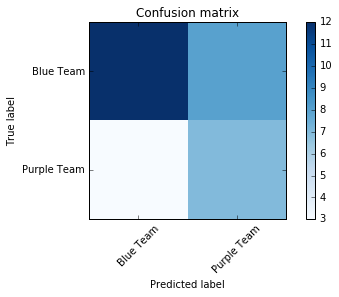

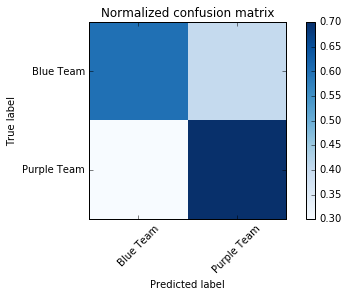

In [83]:
import matplotlib.pyplot as plt

test_pred = adb.predict(feature_test)
labels = ['Blue Team', 'Purple Team']

y_test = results_test 
y_pred = test_pred

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

# Scoring our model visualizing the data
Ok, first thing we are going to do is run a score that will evaluate our model. There are many ways to evaluate it, but the simple "score" method shown here is good enough for this model that we are dealing with. (Others would be F1 and accuracy.)
Also important is to be able to see the prediction in the data, view each "game result" according to our model and compare with its real outcomes.

In [84]:
adb.score(feature_test, results_test)

0.6333333333333333

0.633... as a score is not that bad, a little bit better than a blind guess.
To know if your prediction model is good or not, all you have to do is compare with blind guesses. This case we have only two possible outcomes, either a victory to team purple or victory to team blue, 50-50! Now we have a model that predicts correclty 63.3% of the games.
We saw in the confusion matrix that our model is predicting much more victories to Blue Team over the Purple Team, which shows some bias towards onf of the teams, this may be corrected adding more features or maybe normalizing them (to be tried some other day). 
Also this bias is what is damaging our model, because it can correctly predicts 60% of the games won by the Blue Team, but less than 70% of the games won by purple team. So, if we blind guess "Blue Team Win" 100% of the time, will we score a higher "correct rate" than using the model?
The answer should be "no", but we are dealing with a skill game, not a pure random one, therefore there must be important features left behind to make the prediction a better one (thinking of addind the champions chosen by each team)

* We have 20 victories by Blue Team and 10 victories by Purple Team
* Total of 30 games

In [85]:
Blue_Team_Win = 20
Purple_Team_Win = 10

total_games = Purple_Team_Win + Blue_Team_Win
All_Blue_Bets = (100 / total_games) * Blue_Team_Win
All_Purple_Bets = (100 / total_games) * Purple_Team_Win

print ("Team Blue won:", All_Blue_Bets, "%")
print ("Team Purple won:", All_Purple_Bets, "%")

Team Blue won: 66.66666666666667 %
Team Purple won: 33.333333333333336 %


## 63.3% does not seen great anymore
So as we can see, the highest win rate is higher than our model accuracy. But we have to keep in mind that the accuracy points that this model predicts correctly 70% of the Purple Team wins and 60% of the Blue Team win. This unfortunatelly counts to only 63.3% of the correct predictions, since the purple team so rarelly wins (only 1 in 3) this affects highly the accuracy. I believe that it has much more to do with pure chance in this tournament, so I should try with different tournaments later.

In [86]:
test_data = dta[test_idx]
test_data

,div,data,TeamBlue,TeamPurple,MPB,MPP,MR,TRB,TRP,FRR,...,W10B,L10B,W10P,L10P,HWB,HWP,GBB,GBP,BO,url
1,lcs-s-16,2016-02-29,Renegades - LoL,Team Dignitas - LoL,1,0,B,33,58,B,...,7.0,22.0,7.0,22.0,100.000000,0.000000,29.0,71.0,1,http://www.gosugamers.net/lol/tournaments/8554...
2,lcs-s-16,2016-02-27,Team Solomid,Echo Fox,1,0,B,23,48,B,...,20.0,11.0,20.0,11.0,0.000000,100.000000,58.0,42.0,1,http://www.gosugamers.net/lol/tournaments/8554...
5,lcs-s-16,2016-03-21,Team Solomid,NRG eSports,0,1,P,23,37,P,...,20.0,10.0,20.0,10.0,100.000000,0.000000,72.0,28.0,1,http://www.gosugamers.net/lol/tournaments/8554...
7,lcs-s-16,2016-02-28,Team Impulse,NRG eSports,1,0,B,45,37,B,...,15.0,10.0,15.0,10.0,100.000000,0.000000,42.0,58.0,1,http://www.gosugamers.net/lol/tournaments/8554...
9,lcs-s-16,2016-03-20,Immortals,Team Impulse,1,0,B,5,45,B,...,18.0,18.0,18.0,18.0,0.000000,100.000000,87.0,13.0,1,http://www.gosugamers.net/lol/tournaments/8554...
14,lcs-s-16,2016-03-20,Cloud 9,Echo Fox,1,0,B,19,48,B,...,22.0,11.0,22.0,11.0,0.000000,100.000000,91.0,9.0,1,http://www.gosugamers.net/lol/tournaments/8554...
17,lcs-s-16,2016-03-20,Cloud 9,Team Liquid LoL,0,1,P,19,22,P,...,22.0,13.0,22.0,13.0,25.000000,75.000000,77.0,23.0,1,http://www.gosugamers.net/lol/tournaments/8554...
19,lcs-s-16,2016-03-14,Echo Fox,Counter Logic Gaming LoL,0,1,P,48,11,P,...,6.0,15.0,6.0,15.0,100.000000,0.000000,21.0,79.0,1,http://www.gosugamers.net/lol/tournaments/8554...
20,lcs-s-16,2016-02-28,NRG eSports,Renegades - LoL,1,0,B,37,33,B,...,8.0,13.0,8.0,13.0,0.000000,100.000000,81.0,19.0,1,http://www.gosugamers.net/lol/tournaments/8554...
22,lcs-s-16,2016-03-13,Team Solomid,Team Impulse,1,0,B,23,45,B,...,20.0,18.0,20.0,18.0,33.333333,66.666667,82.0,18.0,1,http://www.gosugamers.net/lol/tournaments/8554...


# The PR column
Now we add the Prediction column to the data (and drop the URL column because it takes too much view space)
The Prediction column will be declared as PR and must show the predicted outcome for a given match.

In [87]:
pd.options.mode.chained_assignment = None

test_data['PR'] = np.array(adb.predict(feature_test))
try:
    test_data = test_data.drop('url', 1)
except:
    pass

In [88]:
test_data.sort('data', ascending=True)

E:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,div,data,TeamBlue,TeamPurple,MPB,MPP,MR,TRB,TRP,FRR,...,W10B,L10B,W10P,L10P,HWB,HWP,GBB,GBP,BO,PR
2,lcs-s-16,2016-02-27,Team Solomid,Echo Fox,1,0,B,23,48,B,...,20.0,11.0,20.0,11.0,0.000000,100.000000,58.0,42.0,1,B
36,lcs-s-16,2016-02-27,Counter Logic Gaming LoL,Immortals,1,0,B,11,5,B,...,27.0,2.0,27.0,2.0,100.000000,0.000000,21.0,79.0,1,P
24,lcs-s-16,2016-02-27,Team Impulse,Team Liquid LoL,0,1,P,45,22,P,...,15.0,13.0,15.0,13.0,85.714286,14.285714,28.0,72.0,1,P
20,lcs-s-16,2016-02-28,NRG eSports,Renegades - LoL,1,0,B,37,33,B,...,8.0,13.0,8.0,13.0,0.000000,100.000000,81.0,19.0,1,P
56,lcs-s-16,2016-02-28,Team Liquid LoL,Team Solomid,1,0,B,22,23,B,...,20.0,24.0,20.0,24.0,62.500000,37.500000,52.0,48.0,1,P
31,lcs-s-16,2016-02-28,Cloud 9,Team Dignitas - LoL,1,0,B,19,58,B,...,22.0,22.0,22.0,22.0,12.500000,87.500000,74.0,26.0,1,B
55,lcs-s-16,2016-02-28,Cloud 9,Counter Logic Gaming LoL,0,1,P,19,11,P,...,22.0,15.0,22.0,15.0,50.000000,50.000000,55.0,45.0,1,B
7,lcs-s-16,2016-02-28,Team Impulse,NRG eSports,1,0,B,45,37,B,...,15.0,10.0,15.0,10.0,100.000000,0.000000,42.0,58.0,1,P
28,lcs-s-16,2016-02-29,Echo Fox,Immortals,0,1,P,48,5,P,...,6.0,2.0,6.0,2.0,100.000000,0.000000,16.0,84.0,1,P
1,lcs-s-16,2016-02-29,Renegades - LoL,Team Dignitas - LoL,1,0,B,33,58,B,...,7.0,22.0,7.0,22.0,100.000000,0.000000,29.0,71.0,1,P
